In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
import pandas as pd

from cnn_model import build_model, train_model, save_cnn_model, load_cnn_model
from models.cnn_v3.cnn_normalize import get_cnn_data, getImagesDataset
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data, plot_direction_comparison
from constants import SP500_TICKER, NASDAQ_TICKER, DJI_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 253, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 252, 250, 16)        │           6,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 250, 247, 8)         │           1,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 494000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │      15,808,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,817,469 (60.34 MB)

 Trainable params: 15,817,469 (60.34 MB)

 Non-trainable params: 0 (0.00 B)

---

## For **train_model** function

In [4]:
# nasdaq_train, nasdaq_test, nasdaq_predict= get_cnn_data(NASDAQ_TICKER)
train, test, predict = get_cnn_data(NASDAQ_TICKER)


print("Train data:")
print(train)

print("Test data:")
print(test)

print("Predict data:")
print(predict)

Train data:
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 256, 256, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Test data:
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 256, 256, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Predict data:
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 256, 256, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - accuracy: 0.4911 - loss: 72.4843
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 0.3878 - loss: 1.4925
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 0.5609 - loss: 1.1057
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 435ms/step - accuracy: 0.4381 - loss: 1.3123
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.6186 - loss: 1.0481


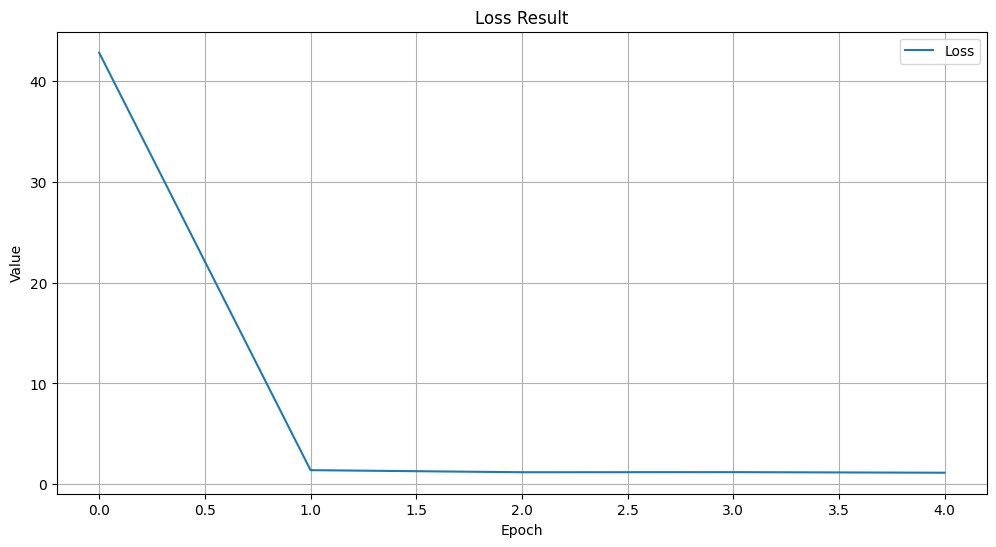

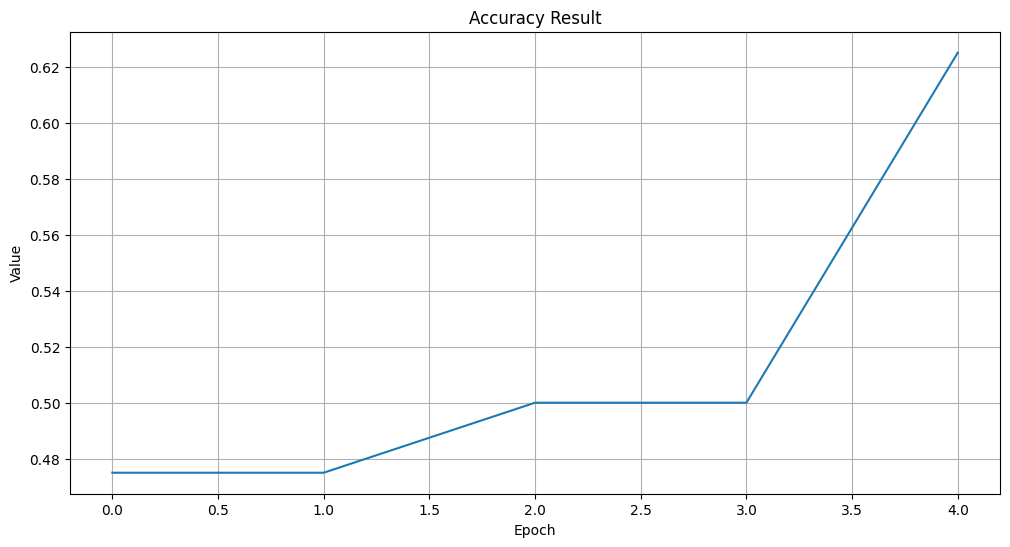

Train result:
Test result:


In [6]:
model, fit_result, evaluate_result = train_model(train, test) 

plot_model_performance(fit_result)
# plot_model_performance(evaluate_result)

print("Train result:")
print(fit_result)

print("Test result:")
print(evaluate_result)

save_cnn_model(model)

In [7]:
latest_train_metrics = [value[-1] for key, value in fit_result.history.items()]

print("Train result:")
print("accuracy, loss, precision, recall")
print(latest_train_metrics)

print("Test result:")
print("loss, accuracy, precision, recall")
print(evaluate_result)

Train result:
accuracy, loss, precision, recall
[0.625, 1.1371259689331055]
Test result:
loss, accuracy, precision, recall


In [8]:
model = load_cnn_model()

In [10]:
predictions_train = model.predict(train)

plot_scatter_data(y_train, predictions_train)
plot_direction_comparison(y_train, predictions_train)

    330/Unknown 16s 46ms/step

In [ ]:
predictions_test = model.predict(x_test)

plot_scatter_data(y_test, predictions_test)
plot_direction_comparison(y_test, predictions_test)


In [ ]:
predictions = model.predict(x_predict)

predictions = predictions

plot_scatter_data(y_predict, predictions)
plot_direction_comparison(y_predict, predictions)